In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [59]:
data = pd.read_csv('../Artifacts/sentiment_analysis.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## data preprocessing 

In [60]:
data.shape

(7920, 3)

In [61]:
data.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool>

In [62]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text preprocessing 

In [63]:
import re
import string

In [64]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [65]:
# convert all the text into lowercase

data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [66]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [67]:
# remove the unwanted links 

data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [68]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
# remove the punchuations 
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [70]:
data.tail()

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [71]:
# remove numbers 
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [72]:
data.tail()

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [73]:
# remove stop words 
!pip install nltk 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import nltk 

In [75]:
nltk.download('stopwords',download_dir='../Static/model')

[nltk_data] Downloading package stopwords to ../Static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [77]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [78]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


In [79]:
# stemming 

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [80]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [81]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


In [82]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## building vacabulary

In [83]:
from collections import Counter
vocab = Counter()

In [84]:
for sentense in data['tweet']:
    vocab.update(sentense.split())

In [85]:
len(vocab)

15949

In [86]:
data.shape

(7920, 3)

In [87]:
token = [ key for key in vocab if vocab[key]>10]

In [88]:
len(token)

1145

In [89]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(token, '../static/model/vocabulary.txt')

In [90]:
#divide dataset 
x = data['tweet']
y = data['label']

In [91]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [93]:
#vectorization 
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst) 
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [94]:
vectorized_x_train = vectorizer(x_train,token)

In [95]:
vectorized_x_test = vectorizer(x_test,token)

In [96]:
y_train.value_counts()

label
0    4725
1    1611
Name: count, dtype: int64

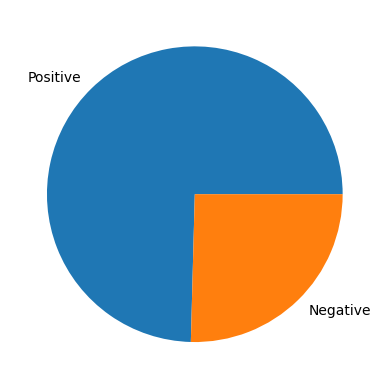

In [97]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [98]:

!pip install imbalanced-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9450, 1145) (9450,)


In [100]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## logistic regression 

In [112]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote , y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote , y_train_pred )

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.937
	Precision = 0.913
	Recall = 0.965
	F1-Score = 0.938
Testing Scores:
	Accuracy = 0.881
	Precision = 0.729
	Recall = 0.87
	F1-Score = 0.793


## Naive bayes

In [113]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote , y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote , y_train_pred )

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.87
	Recall = 0.96
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.873
	Precision = 0.69
	Recall = 0.935
	F1-Score = 0.794


## DecisionTreeClassifier

In [114]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote , y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote , y_train_pred )

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.832
	Precision = 0.689
	Recall = 0.655
	F1-Score = 0.672


## RandomForestClassifier

In [115]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote , y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote , y_train_pred )

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.877
	Precision = 0.779
	Recall = 0.74
	F1-Score = 0.759


## Support Vector Machine

In [118]:
svm = SVC()
svm.fit(vectorized_x_train_smote , y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote , y_train_pred )

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.961
	Recall = 0.996
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.884
	Precision = 0.754
	Recall = 0.827
	F1-Score = 0.789


In [120]:
import pickle 

with open('../static/model/model.pickle','wb')as file :
    pickle.dump(lr,file)